In [20]:
import lyricsgenius
from bs4 import BeautifulSoup
from urllib import request
import nltk
from nltk.corpus import words
import requests
import pandas as pd
from typing import List
import re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#from scrape_and_clean import get_lyrics_from_genius, clean_lyrics, is_english, create_genre_df


In [21]:
# Replace 'your_client_id' and 'your_client_secret' with your actual Client ID and Client Secret
client_id = '884c462e3d3b4cf2874b0479725ab2de'
client_secret = '1ea68633e37646af9f2956788c5e5943'

# Setup authentication
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [34]:
def fetch_songs_by_genre(genre, song_count):
    songs = []
    offset = 0
    limit = 50  # Max limit per API call allowed by Spotify
    seen_songs = set()  # Set to keep track of artist-track combinations

    try:
        while len(songs) < song_count and offset <= 1000:  # Adjusting the condition to avoid bad offsets
            query = f"genre:{genre}"
            results = sp.search(query, type='track', limit=limit, offset=offset)
            tracks = results['tracks']['items']

            for track in tracks:
                artist_name = track['artists'][0]['name']
                track_name = track['name']
                unique_key = (artist_name.lower(), track_name.lower())  # Create a unique key for each song
                
                if unique_key not in seen_songs:  # Check if this song has already been added
                    if len(songs) < song_count:
                        song_info = {
                            'track_name': track_name,
                            'artist': artist_name,
                            'track_id': track['id'],
                            'genre': genre
                        }
                        songs.append(song_info)
                        seen_songs.add(unique_key)  # Add to set to track we've added this song
                    else:
                        break

            offset += limit
    except spotipy.SpotifyException as e:
        print(f"Spotify API Error: {e}")

    return songs

In [53]:
genres = ['rock', 'pop', 'rap'] #'country'

songs_dataset = []

for genre in genres:
    songs = fetch_songs_by_genre(genre, 1000)
    songs_dataset.extend(songs)

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:rock', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Spotify API Error: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Arock&limit=50&offset=1000&type=track:
 Bad request., reason: None


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:pop', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Spotify API Error: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Apop&limit=50&offset=1000&type=track:
 Bad request., reason: None


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:rap', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Spotify API Error: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Arap&limit=50&offset=1000&type=track:
 Bad request., reason: None


In [55]:
# Create DataFrame
spotipy_df = pd.DataFrame(songs_dataset)

# Rename the 'genre' column to 'track_genre'
spotipy_df = spotipy_df.rename(columns={'genre': 'track_genre', 'artist': 'artists'})

# Save to CSV
spotipy_df.to_csv('spotify_songs_dataset.csv', index=False)

In [37]:
genius = lyricsgenius.Genius("RTZe0y0EcpL4i9vPPglZVr43Py6K6P3LVZMO6cbSBEpP7cKZXY6SoiErdQpFD-H8")

In [38]:
genius.verbose = True # Turn off status messages
genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title

In [5]:
artist = genius.search_artist("Eminem", max_songs=3, sort="title")

Searching for songs by Eminem...

Song 1: "10, 9, 8"
Song 2: "12 Days of Diss-Mas"
Song 3: "1-833-2GET-REV (REVIVAL Voicemail)"

Reached user-specified song limit (3).
Done. Found 3 songs.


In [ ]:
pinball_wizard = genius.search_song("Pinball Wizard", "The Who")
print(pinball_wizard.lyrics)

In [ ]:
reservoir_dogs = genius.search_song("God Only Knows - Mono / 1997 Remastered", 
                                    "The Beach Boys")
print(reservoir_dogs.lyrics)

In [58]:
paint_it_black = genius.search_song("Let It Be", 
                                    "The Beatles")
print(paint_it_black.lyrics)


Searching for "Let It Be" by The Beatles...


Timeout: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)

In [12]:
album = genius.search_album("The Magnolia Electric Co.", "Songs: Ohia")
album_text = album.to_text()
album_text
#album

Searching for "The Magnolia Electric Co." by Songs: Ohia...


'37 ContributorsFarewell Transmission Lyrics[Verse 1]\nThe whole place is dark\nEvery light on this side of the town\nSuddenly it all went down\nNow we\'ll all be brothers of\nThe fossil fire of the sun\nNow we will all be sisters of\nThe fossil blood of the moon\n\n[Verse 2]\nSomeone must have set \'em up\nNow they\'ll be working in the cold grey rock\nNow they\'ll be working in the hot mill steam...\nNow they\'ll be working in the concrete\nIn the sirens and the silences now\nAll the great set up hearts\nAll at once start to beat\n\n[Verse 3]\nAfter tonight if you don\'t want this to be\nA secret out of the past\nI will resurrect it, I\'ll have a good go at it\nI\'ll streak his blood across my beak\nDust my feathers with his ash\nI can feel his ghost breathing down my back\nYou might also like[Chorus]\nI will try and know whatever I try\nI will be gone but not forever\nI will try and know whatever I try\nI will be gone but not forever\n\n[Verse 4]\nReal truth about it is\nNo one gets

In [7]:
spotifydf = pd.read_csv('/Users/jordanbruce/Desktop/CADS/Spring_2024/CS 632/Song-Lyrics-NLP/src/Spotify.csv')

# Columns based on which to identify duplicates
columns_to_check = ['artists', 'track_name', 'track_genre']

# Remove duplicates, keep the first occurrence
spotifydf = spotifydf.drop_duplicates(subset=columns_to_check, keep='first')


In [8]:
spotifydf.size

2104410

In [9]:
#find all unique values for track_genre
spotifydf['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [10]:
def get_genre_by_track_and_artist(track_name, artist_name):
    # Filter the DataFrame for the track and artist (case insensitive)
    track_row = spotifydf[
        (spotifydf['track_name'].str.lower() == track_name.lower()) & 
        (spotifydf['artists'].str.lower().str.contains(artist_name.lower()))
    ]

    # Check if the song is in the dataset and retrieve the genre
    if not track_row.empty:
        genre = track_row['track_genre'].iloc[0]
        return genre
    else:
        return "Genre not found"

# Example usage
track_to_search = "without me"
artist_to_search = "eminem"  # Replace with the correct artist name
genre = get_genre_by_track_and_artist(track_to_search, artist_to_search)
print(f"The genre of '{track_to_search}' by {artist_to_search} is: {genre}")

The genre of 'without me' by eminem is: hip-hop


In [39]:
def get_lyrics_from_genius(row):
    try:
        song = genius.search_song(row['track_name'], row['artists'])
        return song.lyrics if song else "Lyrics not found"
    except Exception as e:
        print(f"Error occurred while fetching lyrics: {e}")
        return "Lyrics not found"

def clean_lyrics(lyrics):
    lyrics = re.sub(r'\[.*?\]', '', lyrics)  # Removes any remaining bracketed sections
    # Remove trailing 'Embed' and any numbers directly before it
    lyrics = re.sub(r'\d*Embed$', '', lyrics, flags=re.MULTILINE)
    return lyrics.strip()  # Remove any leading/trailing whitespace

def is_english(lyrics):
    # Load list of English words
    english_vocab = set(words.words())
    words_in_lyrics = set(nltk.word_tokenize(lyrics.lower()))  # Tokenize and convert to lower case
    english_words = words_in_lyrics.intersection(english_vocab)
    
    if len(words_in_lyrics) == 0:  # Prevent division by zero
        return False

    # Calculate the percentage of words in the lyrics that are English
    threshold = 0.6  # 90% of the words must be English
    return (len(english_words) / len(words_in_lyrics)) > threshold

def create_genre_df(genres: List[str], sample: int, spotifydf: pd.DataFrame):
    frames = []
    christmas_keywords = ['christmas', 'jingle', 'rudolph', 'santa', 'snow', 
                          'xmas', 'merry', 'jolly', 'holly', 'noel', 'gift', 
                          'sleigh', 'carol', 'frosty', 'elf', 'reindeer', 
                          'mistletoe', 'presents', 'yuletide', 'december', 
                          'winter', 'holiday', 'navidad', 'feliz',
                          'deck the halls', 'silent night', 'saint nick', 
                          'wonderful time of the year', 'holy night', 
                          'joy to the world', 'drummer boy']
    
    for genre in genres:
        genre_df = spotifydf[spotifydf['track_genre'] == genre].copy()
        
        # Exclude Christmas songs by checking for christmas_keywords in 'track_name'
        genre_df = genre_df[~genre_df['track_name'].str.lower().str.contains('|'.join(christmas_keywords))]
        
        lyrics_df = pd.DataFrame(columns=genre_df.columns)  # Ensure we have the same columns

        while len(lyrics_df) < sample and not genre_df.empty:
            sample_df = genre_df.sample(n=1)
            genre_df = genre_df.drop(sample_df.index)  # Remove sampled song to avoid resampling
            
            sample_df['Lyrics'] = sample_df.apply(get_lyrics_from_genius, axis=1)
            sample_df['Lyrics'] = sample_df['Lyrics'].apply(clean_lyrics)
            
            song_title = sample_df['track_name'].iloc[0].lower()
            if song_title in sample_df['Lyrics'].iloc[0].lower():
                lyrics = sample_df['Lyrics'].iloc[0]
                lyrics_start_index = lyrics.lower().find("lyrics")
                if lyrics_start_index != -1:
                    sample_df['Lyrics'] = lyrics[lyrics_start_index + len("lyrics"):].strip()
                
                # Only append if lyrics were found and the song is in English
                if sample_df['Lyrics'].iloc[0] != "Lyrics not found" and is_english(sample_df['Lyrics'].iloc[0]):
                    lyrics_df = pd.concat([lyrics_df, sample_df])
        
        frames.append(lyrics_df)
        
    return pd.concat(frames, ignore_index=True)

In [57]:
songs_df = create_genre_df(genres, 200, spotipy_df)

Searching for "Johnson Should Move To Cincinnati, Pronto!" by Moes Haven...
No results found for: 'Johnson Should Move To Cincinnati, Pronto! Moes Haven'
Searching for "Mushy Song - Remastered Version" by Color It Red...
Done.
Searching for "Hazelnut Coffee" by SadGirl...
Done.
Searching for "Where Will I Go" by Darkseed...
Done.
Searching for "Tonka" by Novi Fosili...
Done.
Searching for "Todas Nuestras Luchas" by Itaca Band...
Done.
Searching for "Baby, Let Me Follow You Down - Live at Royal Albert Hall, London, UK - May 26, 1966" by Bob Dylan...
No results found for: 'Baby, Let Me Follow You Down - Live at Royal Albert Hall, London, UK - May 26, 1966 Bob Dylan'
Searching for "Bittersweet" by The Van T's...
Done.
Searching for "A.M" by AqME...
Done.
Searching for "Mama" by Miki Jevremovic...
No results found for: 'Mama Miki Jevremovic'
Searching for "Just Like a River" by Stranger & Gladdy...
Done.
Searching for "Suéltate Rock and Roll" by David Lebón...
Done.
Searching for "Hasta Ma

In [59]:
songs_df.shape

(527, 5)

In [60]:
# Count the number of songs per genre
genre_counts = songs_df['track_genre'].value_counts()

old_genre_counts = saved_songs_df['track_genre'].value_counts()
# Print the counts
print(genre_counts)
print(old_genre_counts)

track_genre
rock    200
rap     196
pop     131
Name: count, dtype: int64
track_genre
country    319
rap        242
rock       211
pop        125
Name: count, dtype: int64


In [50]:
# Count the number of songs per genre for the entire DataFrame
genre_counts = spotifydf['track_genre'].value_counts()

# Select counts for specific genres
specific_genre_counts = genre_counts.loc[['rock', 'country', 'pop', 'hip-hop']]

# Print the counts
print(specific_genre_counts)

track_genre
rock       575
country    607
pop        767
hip-hop    733
Name: count, dtype: int64


In [51]:
saved_songs_df = songs_df.copy()
rock_df = songs_df[songs_df['track_genre'].isin(['rock'])]
country_df = songs_df[songs_df['track_genre'].isin(['country'])]
pop_df = songs_df[songs_df['track_genre'].isin(['pop'])]
rap_df = songs_df[songs_df['track_genre'].isin(['rap'])]

In [66]:
df_1 = pd.read_csv("/Users/jordanbruce/Desktop/CADS/Spring_2024/CS 632/Song-Lyrics-NLP/src/songs_lyrics.csv")
df_2 = songs_df
df_3 = saved_songs_df
df_combined = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [67]:
unique_df = df_combined.drop_duplicates()

In [68]:
# Count the number of songs per genre for the entire DataFrame
genre_counts = unique_df['track_genre'].value_counts()

# Select counts for specific genres
specific_genre_counts = genre_counts.loc[['rock', 'country', 'pop', 'rap']]

# Print the counts
print(specific_genre_counts)

track_genre
rock       656
country    619
pop        350
rap        323
Name: count, dtype: int64


In [70]:
unique_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Lyrics
0,91981.0,5ugV3rhvi2h6l52e1cIfLw,3 Doors Down,Fishing Music,Kryptonite,0.0,234626.0,False,0.544,0.848,...,0.0,0.0288,0.00395,0.000052,0.1340,0.489,99.039,4.0,rock,"Well, I took a walk around the world to ease m..."
1,91357.0,5Hroj5K7vLpIG4FNCRIjbP,American Authors,"Oh, What A Life",Best Day Of My Life,79.0,194240.0,False,0.673,0.902,...,1.0,0.0346,0.05910,0.000262,0.0558,0.538,100.012,4.0,rock,"(Woo, oh-oh, oh-oh, oh)\n\n\nI had a dream so ..."
2,91953.0,0z5x3VmmQ7cyTeOP7VAf3T,Arctic Monkeys,The Car,Perfect Sense,40.0,167379.0,False,0.520,0.478,...,1.0,0.0276,0.61000,0.001220,0.1050,0.545,82.932,4.0,rock,"Richard of York, the Executive Branch\nHaving ..."
3,91644.0,4GPQDyw9hC1DiZVh0ouDVL,The Black Keys,OK Boomers - Top Tunes,Keep My Name Outta Your Mouth,0.0,189356.0,False,0.597,0.702,...,1.0,0.0445,0.01970,0.010000,0.1250,0.645,83.507,4.0,rock,Cry to myself and hanging 'round\nThis old ves...
4,91015.0,68EkhVWIeULhHxcbi1QhzK,AJR,OK ORCHESTRA,World's Smallest Violin,80.0,180746.0,True,0.680,0.697,...,1.0,0.0484,0.12100,0.000000,0.6610,0.684,116.033,4.0,rock,My grandpa fought in World War II\nHe was such...


In [71]:
# List of columns to keep
columns_to_keep = ['artists', 'track_name', 'track_genre', 'Lyrics']

# Use list comprehension to create a list of columns to drop
columns_to_drop = [col for col in unique_df.columns if col not in columns_to_keep]

# Drop the columns
final_df = unique_df.drop(columns=columns_to_drop)

In [74]:
final_df = final_df.groupby('track_genre').head(320)

In [81]:
final_df['track_genre'].value_counts()

track_genre
rock       320
pop        320
country    320
rap        320
Name: count, dtype: int64

In [77]:
final_df = final_df[final_df['track_genre'] != 'hip-hop']

In [82]:
#download to csv
final_df.to_csv('Final_Lyrics_Data.csv', index=False)

In [52]:
saved_songs_df.shape

(897, 5)

In [43]:
songs_df.head()

,track_name,artists,track_id,track_genre,Lyrics
0,Macabre,Blaue Blume,2HhaMcXCBzasob1gnX1qNf,rock,Thank the stars for your good life\nYou have g...
1,The Last Gunfighter Ballad,Johnny Cash,72Tff5TvTSvEI8R4gqmdH8,rock,The old gunfighter stood on the porch and star...
2,Incident on South Dowling,Paul Kelly,5cVh18XTidUMzN1iiZzbop,rock,My baby was dying\nTurning so blue\nFour feet ...
3,Knowledge,Anderson/Stolt,1SG9PzWTHvQueZKExYvWpd,rock,Being this and reading this inventioning\nAlwa...
4,Free All The People (South Africa),Santana,1BCODfvcjnfHXMPYRhhnwR,rock,Chorus:\nYou got to free all the people in Sou...


In [44]:
print(songs_df["track_name"].iloc[21])
print(songs_df["Lyrics"].iloc[21])


Important
All this ice on me, I'm cold, I need a Moncler
All this water on me, I'm wet, I need some swim gear
I fuck bitches by the threes, I don't do the pairs
And I only fuck with the gang, I don't do the squares
She call me daddy when she see me, yeah she glad to see me
I was starvin', now you see me on your plasma TV
I hit the gas and get on my level, and it take me there
I just might spazz, I just might crash
If they don't play me fair
Glock nine on me all in my shows, tucked in my underwear
And I'ma blow it if a nigga try me, please don't take me there
Guap all in my pocket look like thigh pads
When your belt cost a lot she like why sag?


I leveled up, I feel important
Came up with this without a chorus
About my green like a forest
In your city like a tourist
Where your hood, where your whores at?
If you want problems don't avoid that
I leveled up, I feel important
I leveled up, I feel important


I'm hearin' voices sayin' flex on 'em
I'm whippin' dope with the Patek on me
I'm a

In [30]:
print(songs_df["track_name"].iloc[24])
print(songs_df["Lyrics"].iloc[24])

Joy
I don't want you anymore
Cause you took my joy
I don't want you anymore
You took my joy
You took my joy
I want it back
You took my joy
I want it back


I'm gonna go to West Memphis
And look for my joy
Go to West Memphis
And look for my joy
Maybe in West Memphis
I'll find my joy
Maybe in West Memphis
I'll find my joy


I'm gonna go to Slidell
And look for my joy
Go to Slidell
And look for my joy
Maybe in Slidell
I'll find my joy
Maybe in Slidell
I'll find my joy
See Lucinda Williams LiveGet tickets as low as $90You might also like
You got no right to take my joy
I want it back
You got no right to take my joy
I want it back
You took my joy
I want it back
You took my joy
I want it back


I'm gonna go to West Memphis
And look for my joy
Go to West Memphis
And look for my joy
Maybe in West Memphis
I'll find my joy
Maybe in West Memphis
I'll find my joy


I'm gonna go to Slidell
And look for my joy
Go to Slidell
And look for my joy
Maybe in Slidell
I'll find my joy
Maybe in Slidell
I'll 

In [31]:
print(songs_df["track_name"])

0             In Over My Head
1                      Wanted
2                      Wanted
3            Laundromat Blues
4                     Umbongo
                ...          
115                  21 to 17
116    Have You Seen Her Face
117              Adios Mexico
118         See You in Church
119                  Bull Cow
Name: track_name, Length: 120, dtype: object


In [32]:
print(songs_df["artists"])

0                KANE
1        Hunter Hayes
2        Hunter Hayes
3         Albert King
4          Gilla Band
            ...      
115        Neal McCoy
116         The Byrds
117    Texas Tornados
118      Tanner Adell
119        Lead Belly
Name: artists, Length: 120, dtype: object


In [33]:
#print the columns of the dataframe
print(songs_df.columns)

Index(['track_name', 'artists', 'track_id', 'track_genre', 'Lyrics'], dtype='object')


In [209]:
# List of columns to keep
columns_to_keep = ['artists', 'track_name', 'track_genre', 'Lyrics']

# Use list comprehension to create a list of columns to drop
columns_to_drop = [col for col in saved_songs_df.columns if col not in columns_to_keep]

# Drop the columns
songs_df_new = saved_songs_df.drop(columns=columns_to_drop)

In [210]:
songs_df_new.head()

,artists,track_name,track_genre,Lyrics
0,Korn,Rotting in Vain,rock,I wouldn't be angry if you'd just fucking cry\...
1,OneRepublic,Christmas Without You,rock,"It's almost midnight, where you lay your head\..."
2,Juanes,Vía Láctea,rock,Llevo tu voz en mi voz\nGrabada con aerosol\nT...
3,Twenty One Pilots,Stressed Out,rock,I wish I found some better sounds no one's eve...
4,Bryan Adams,Summer Of '69,rock,I got my first real six-string\nBought it at t...


In [86]:
#download to csv
saved_songs_df.to_csv('songs_lyrics.csv', index=False)

In [13]:
df = pd.read_csv('songs_lyrics.csv')

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jordanbruce/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text, theme_light


In [16]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(lyrics):
    return sia.polarity_scores(lyrics)['compound']

df['Sentiment'] = df['Lyrics'].apply(get_sentiment)

In [18]:
# Define a function to calculate average words per line
def average_words_per_line(lyrics):
    lines = lyrics.split('\n')  # Split the lyrics into lines
    if len(lines) == 0:
        return 0
    word_counts = [len(line.split()) for line in lines if line.strip() != '']  # List of word counts per line
    return sum(word_counts) / len(word_counts)  # Return average

# Apply the function to create a new column for average words per line
df['Avg_Words_Per_Line'] = df['Lyrics'].apply(average_words_per_line)

In [19]:
df

,artists,track_name,track_genre,Lyrics,Sentiment,Avg_Words_Per_Line
0,Korn,Rotting in Vain,rock,I wouldn't be angry if you'd just fucking cry\...,-0.9823,6.137931
1,OneRepublic,Christmas Without You,rock,"It's almost midnight, where you lay your head\...",-0.9862,9.214286
2,Juanes,Vía Láctea,rock,Llevo tu voz en mi voz\nGrabada con aerosol\nT...,-0.8834,5.516129
3,Twenty One Pilots,Stressed Out,rock,I wish I found some better sounds no one's eve...,0.9980,11.583333
4,Bryan Adams,Summer Of '69,rock,I got my first real six-string\nBought it at t...,0.9856,6.239130
...,...,...,...,...,...,...
395,Gabby Barrett;Charlie Puth,I Hope (feat. Charlie Puth),country,10-110. Miley Cyrus – Midnight Sky\n9. Kylie M...,0.9711,6.512821
396,Bailey Zimmerman,Where It Ends,country,This is where it ends\nI been down a few broke...,-0.0880,8.731707
397,Morgan Wallen,Wasted On You,country,"I don't always wake up in the mornin', pour my...",-0.9966,7.861111
398,Kenny Chesney,Everyone She Knows,country,Everyone she knows is getting married\nAll the...,0.3365,5.903846


In [22]:
agg_df = df.groupby('track_genre').agg({
    'Sentiment': 'mean',
    'Avg_Words_Per_Line': 'mean'
}).reset_index()

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_92007/2773416366.py:8: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


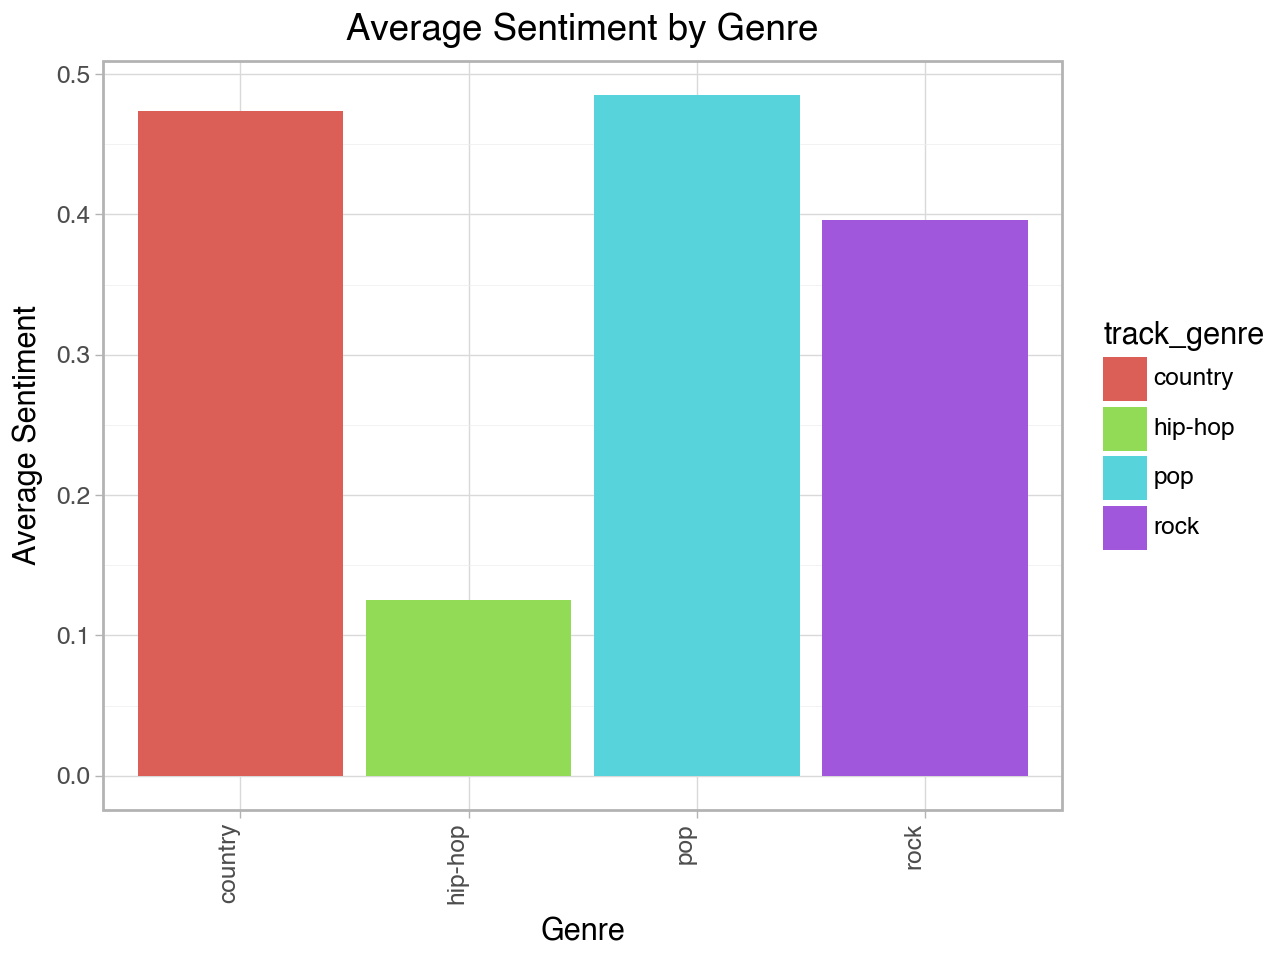

In [29]:
sentiment_plot = (
    ggplot(agg_df, aes(x='track_genre', y='Sentiment', fill='track_genre')) +
    geom_bar(stat='identity') +  # Use identity to tell ggplot these are pre-summarized counts
    labs(title='Average Sentiment by Genre', x='Genre', y='Average Sentiment') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x labels for better visibility
)
print(sentiment_plot)


/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_92007/1128661466.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


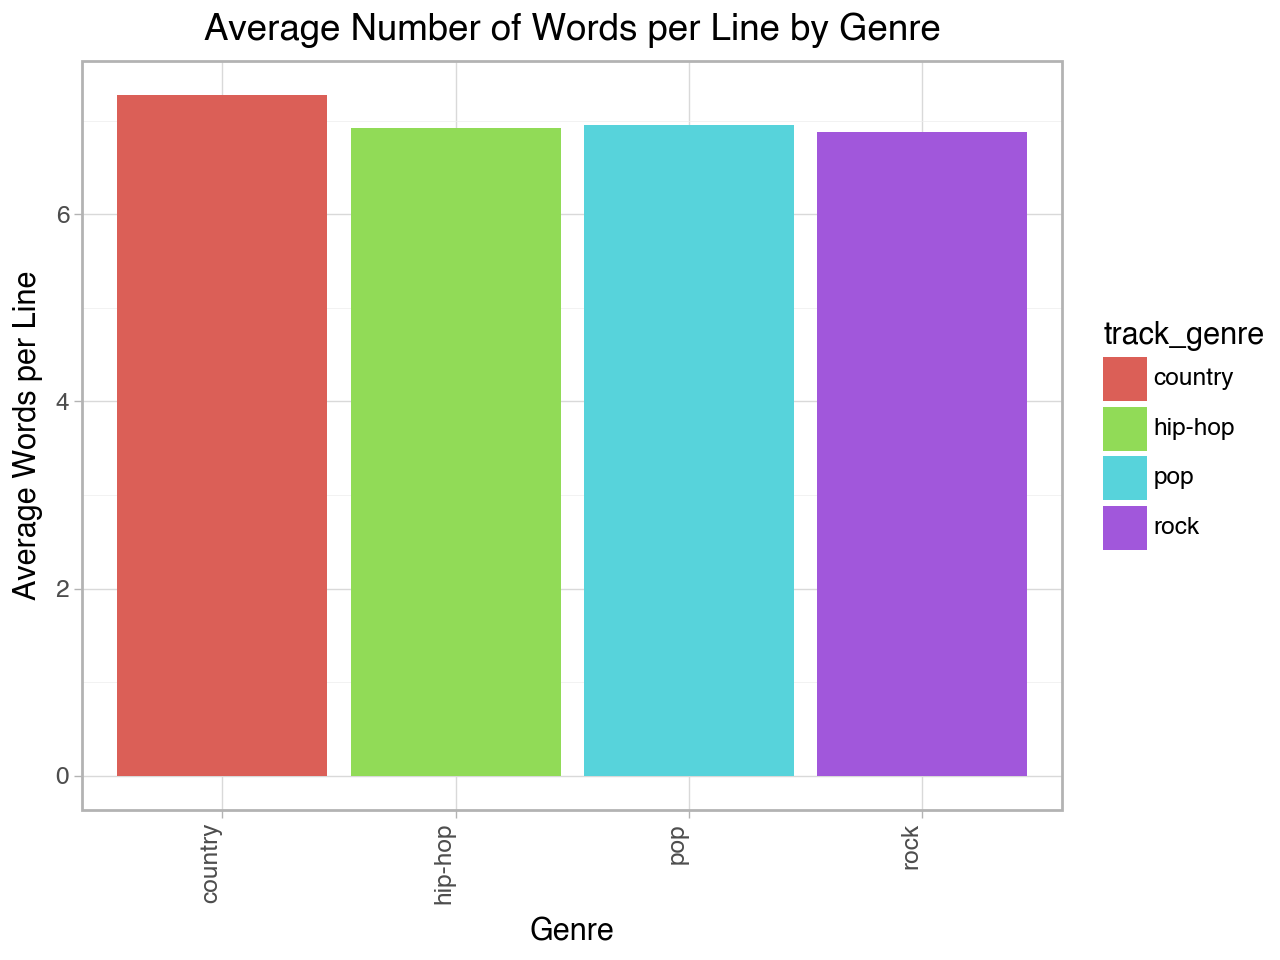

In [30]:
# Bar chart for average words per line by genre
line_length_plot = (
    ggplot(agg_df, aes(x='track_genre', y='Avg_Words_Per_Line', fill='track_genre')) +
    geom_bar(stat='identity') +
    labs(title='Average Number of Words per Line by Genre', x='Genre', y='Average Words per Line') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x labels for better visibility
)
print(line_length_plot)

In [44]:
#print the lyrics of the first song
print(df['Lyrics'].iloc[4])

I got my first real six-string
Bought it at the five and dime
Played it 'til my fingers bled
Was the summer of '69


Me and some guys from school
Had a band and we tried real hard
Jimmy quit and Jody got married
I should've known we'd never get far


Oh, when I look back now
That summer seemed to last forever
And if I had the choice
Yeah, I'd always wanna be there
Those were the best days of my life


Ain't no use in complainin'
When you got a job to do
I spent my evenings down at the drive-in
And that's when I met you, yeah


Standin' on your mama's porch
You told me that you'd wait forever
Oh, and when you held my hand
I knew that it was now or never
Those were the best days of my life
Oh, yeah
Back in the summer of '69, oh
See Bryan Adams LiveGet tickets as low as $59You might also like
Man, we were killin' time
We were young and restless
We needed to unwind
I guess nothing can last forever
Forever, no
Yeah


And now the times are changin'
Look at everything that's come and gone
Som

In [46]:
def uniqueness(lyrics):
    # Split the lyrics into lines
    lines = lyrics.splitlines()
    
    # Remove empty lines
    lines = [line.strip() for line in lines if line.strip() != '']
    
    # Calculate the percentage of unique lines
    unique_lines = set(lines)  # Using a set to store unique lines
    if len(lines) > 0:
        unique_percentage = len(unique_lines) / len(lines)
    else:
        unique_percentage = 0  # Avoid division by zero if all lines are empty
    
    return unique_percentage

In [47]:
df['Unique_Line_Percentage'] = df['Lyrics'].apply(uniqueness)

In [48]:
df.head()

,artists,track_name,track_genre,Lyrics,Sentiment,Avg_Words_Per_Line,Unique_Line_Percentage
0,Korn,Rotting in Vain,rock,I wouldn't be angry if you'd just fucking cry\...,-0.9823,6.137931,0.551724
1,OneRepublic,Christmas Without You,rock,"It's almost midnight, where you lay your head\...",-0.9862,9.214286,0.750000
2,Juanes,Vía Láctea,rock,Llevo tu voz en mi voz\nGrabada con aerosol\nT...,-0.8834,5.516129,0.741935
3,Twenty One Pilots,Stressed Out,rock,I wish I found some better sounds no one's eve...,0.9980,11.583333,0.645833
4,Bryan Adams,Summer Of '69,rock,I got my first real six-string\nBought it at t...,0.9856,6.239130,0.869565


In [49]:
genre_uniqueness = df.groupby('track_genre')['Unique_Line_Percentage'].mean().reset_index()

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_92007/2118134218.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


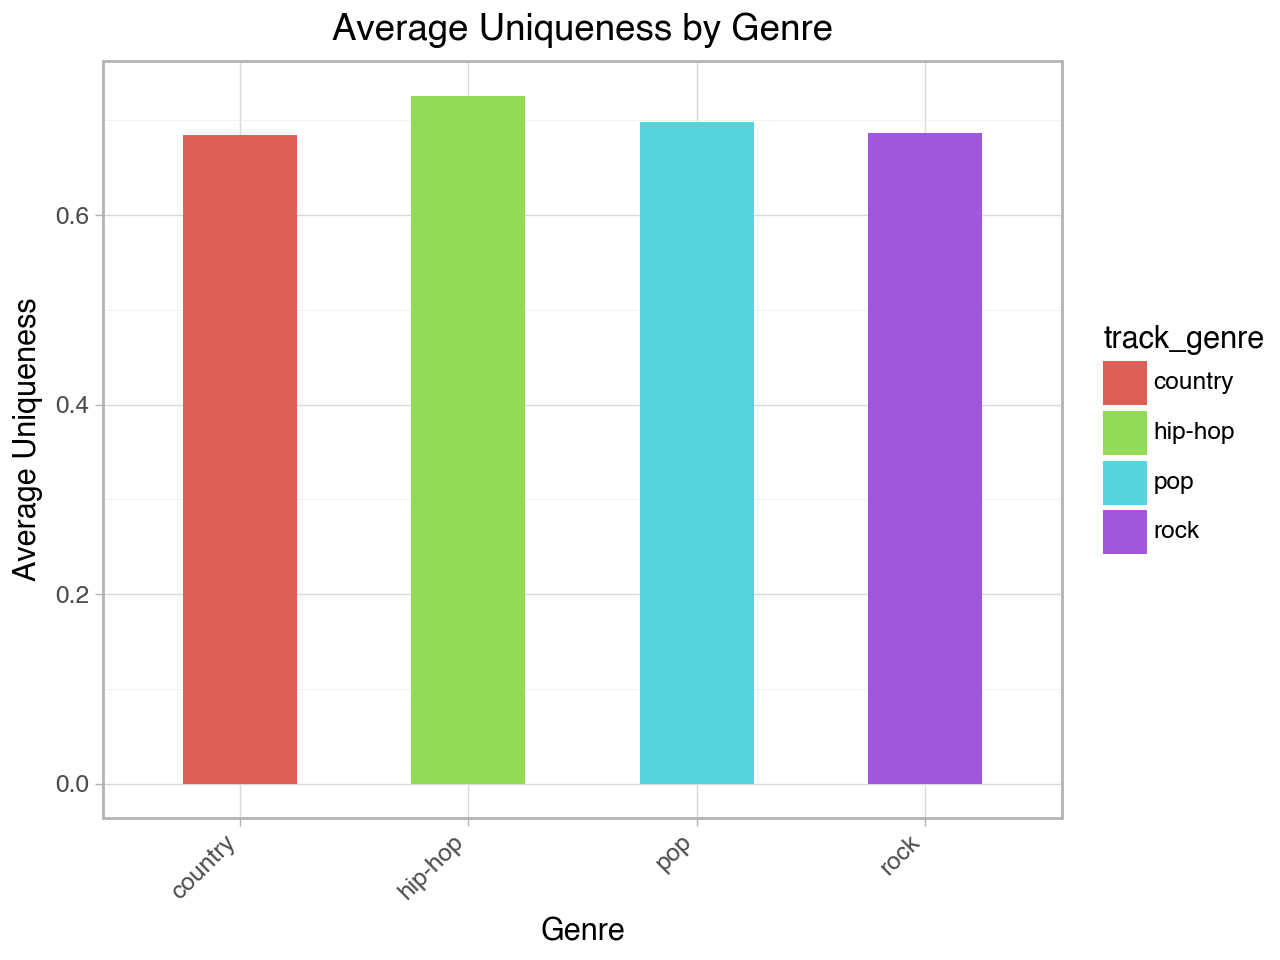

In [50]:
# Create a bar chart for average uniqueness per genre
uniqueness_plot = (
    ggplot(genre_uniqueness, aes(x='track_genre', y='Unique_Line_Percentage', fill='track_genre')) +
    geom_bar(stat='identity', width=0.5) +  # Use identity to use the y values as heights directly
    labs(title='Average Uniqueness by Genre', x='Genre', y='Average Uniqueness') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Improve label readability
)
print(uniqueness_plot)

In [ ]:
def line_tokenize(text):
    # Split the text into lines using splitlines(), which handles various newline characters
    lines = text.splitlines()

    # Filter out empty lines if you just want non-empty lines
    lines = [line for line in lines if line.strip() != '']
    
    return lines